# IMPORTING NECESSARY LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# READ THE DATASET

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [5]:
data["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [6]:
data["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [7]:
data.shape

(50000, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


# DATA CLEANING

DROP UNWANTED COLUMN

In [9]:
data["Volume"] = data["x"]*data["y"]*data["z"]

In [10]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [11]:
data.drop(["x","y","z"],axis=1,inplace=True)

In [12]:
data.head()

,carat,cut,color,clarity,depth,table,price,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


CHECKING NULL VALUES


In [13]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
Volume     0
dtype: int64

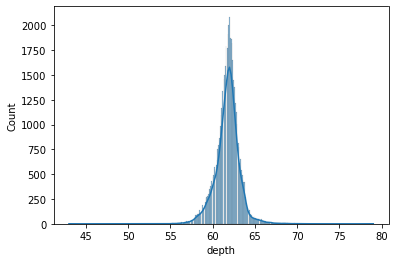

In [14]:
sns.histplot(data=data,x="depth",kde = True )
plt.show()

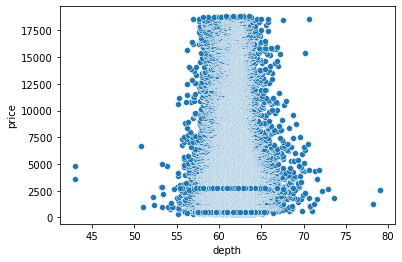

In [15]:
sns.scatterplot(x=data['depth'], y=data['price'])
plt.show()

In [16]:
depth_mean = data["depth"].mean()
depth_mean

61.75300599999956

In [17]:
depth_median = data["depth"].median()
depth_median

61.8

CHECK DUPLICATED VALUES


In [18]:
data.duplicated().sum()

126

DROP DUPLICATED VALUES

In [19]:
 data = data.drop_duplicates()

In [20]:
data.shape

(49874, 8)

In [21]:
data.head()

,carat,cut,color,clarity,depth,table,price,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [22]:
data.duplicated().sum()

0

CHECK SKEWNESS

In [23]:
data.skew()

C:\Users\debaj\AppData\Local\Temp\ipykernel_13288\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


carat     1.115664
depth    -0.065318
table     0.794318
price     1.610387
Volume    3.175357
dtype: float64

# FEATURE ENGINEERING

CONVERT CATEGORICAL VALUES INTO NUMERICAL

In [24]:
labelencoder = LabelEncoder()
data["cut"]= labelencoder.fit_transform(data["cut"])
data["color"]= labelencoder.fit_transform(data["color"])
data["clarity"]= labelencoder.fit_transform(data["clarity"])

C:\Users\debaj\AppData\Local\Temp\ipykernel_13288\2854842166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cut"]= labelencoder.fit_transform(data["cut"])
C:\Users\debaj\AppData\Local\Temp\ipykernel_13288\2854842166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["color"]= labelencoder.fit_transform(data["color"])
C:\Users\debaj\AppData\Local\Temp\ipykernel_13288\2854842166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [25]:
data

,carat,cut,color,clarity,depth,table,price,Volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
49995,0.72,2,0,2,60.8,57.0,2757,115.920000
49996,0.72,1,0,2,63.1,55.0,2757,118.110175
49997,0.70,4,0,2,62.8,60.0,2757,114.449728
49998,0.86,3,4,3,61.0,58.0,2757,140.766120


In [26]:
data.shape

(49874, 8)

# DATA VISULAIZATION

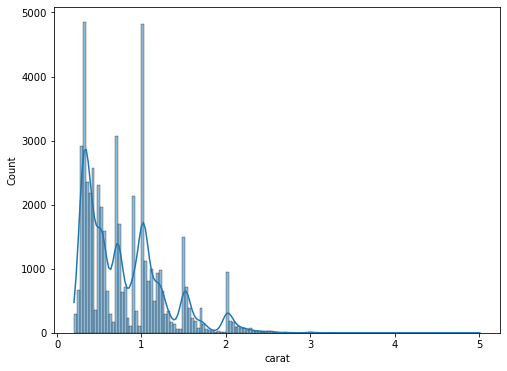

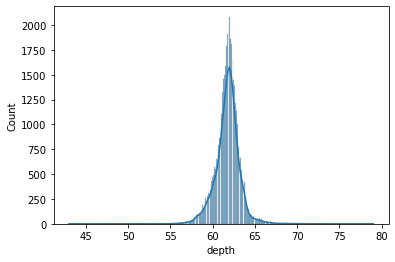

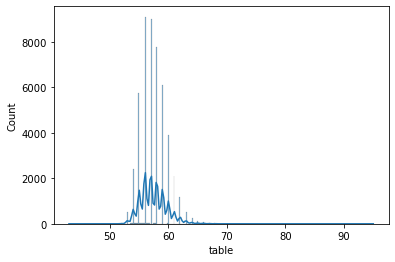

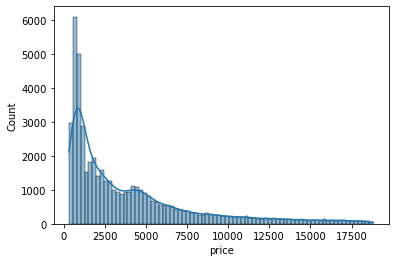

In [27]:
feature = ['carat', 'depth', 'table', 'price']
plt.figure(figsize=(8,6))
x=0
for i in feature:
    sns.histplot(data=data,x=i,kde=True)
    print('\n')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


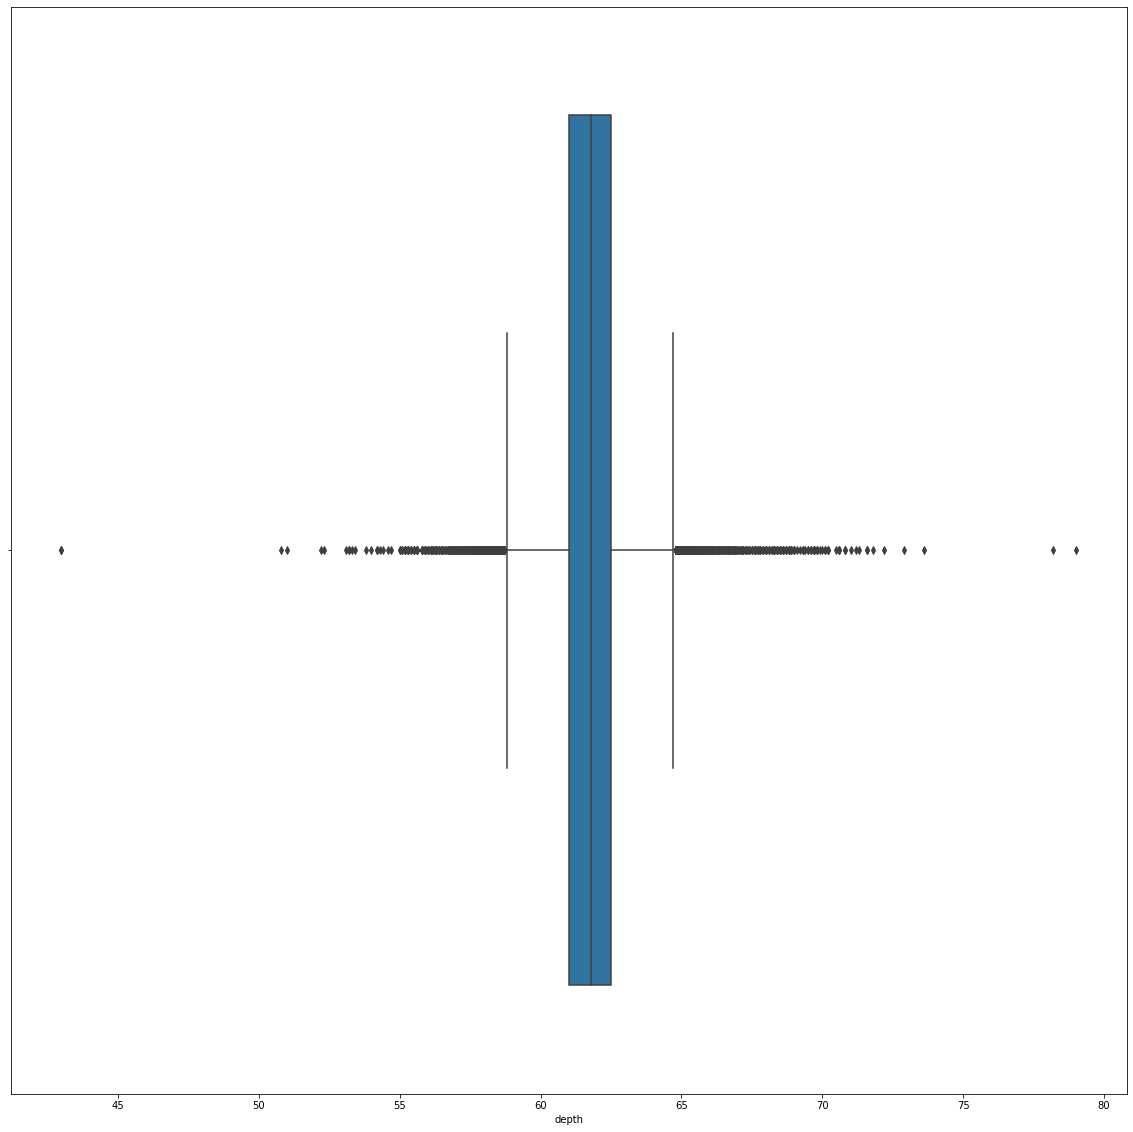

In [28]:
plt.figure(figsize=(20,20))
sns.boxplot(data['depth'])
plt.show()

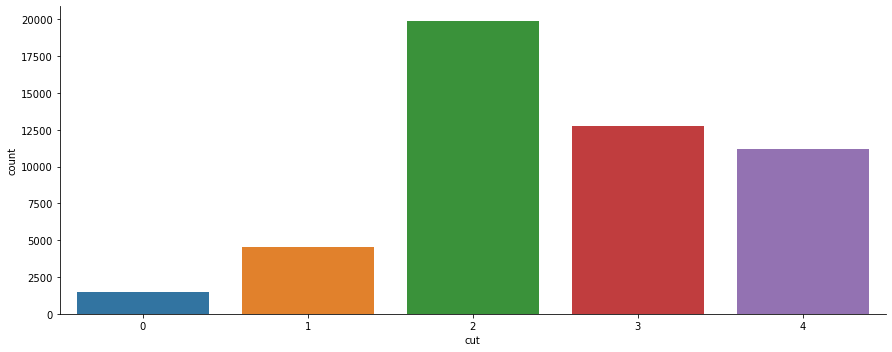

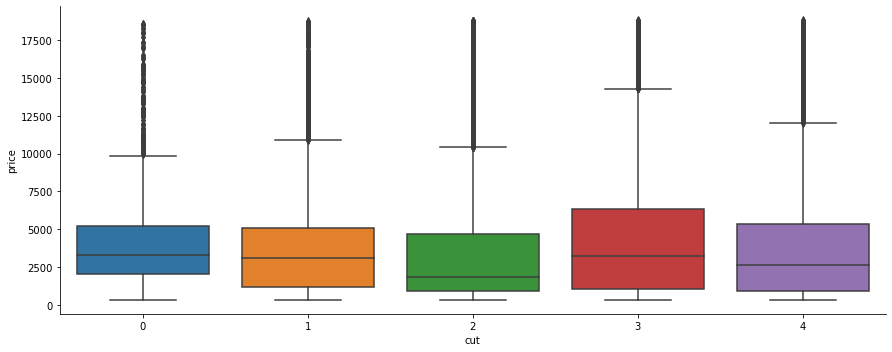

In [29]:
sns.catplot(x= "cut", data = data, kind = "count", aspect = 2.5)
sns.catplot(x = "cut", y = "price", kind = "box", data = data, aspect = 2.5)

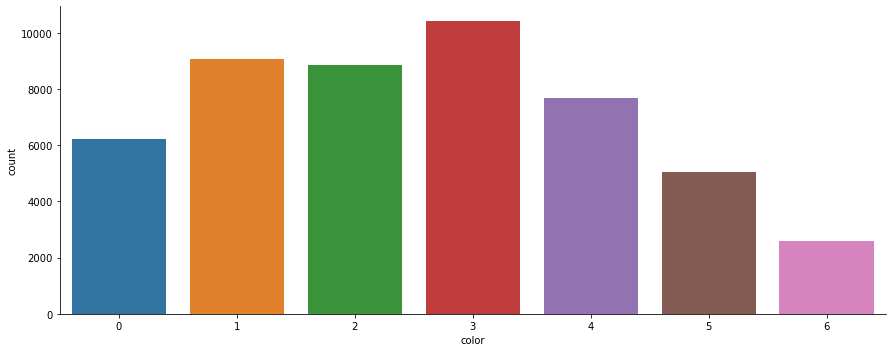

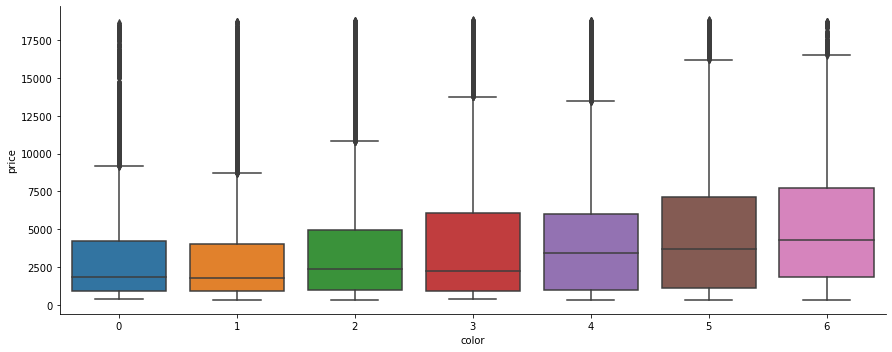

In [30]:
sns.catplot(x = "color", data = data, kind = "count", aspect = 2.5)
plt.show()
sns.catplot(x = "color", y = "price", kind = "box", data = data, aspect = 2.5)
plt.show()

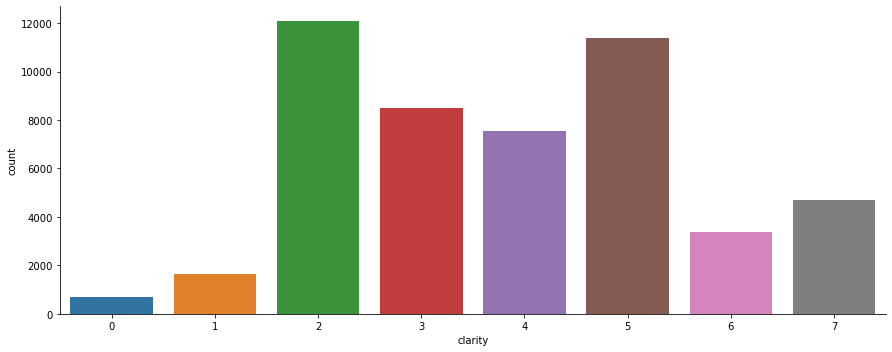

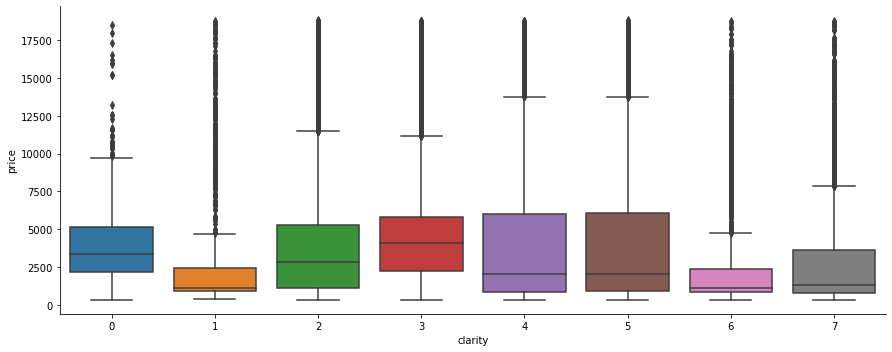

In [31]:
sns.catplot(x = "clarity", data = data, kind = "count", aspect = 2.5)
plt.show()
sns.catplot(x = "clarity", y = "price", kind = "box", data = data, aspect = 2.5)

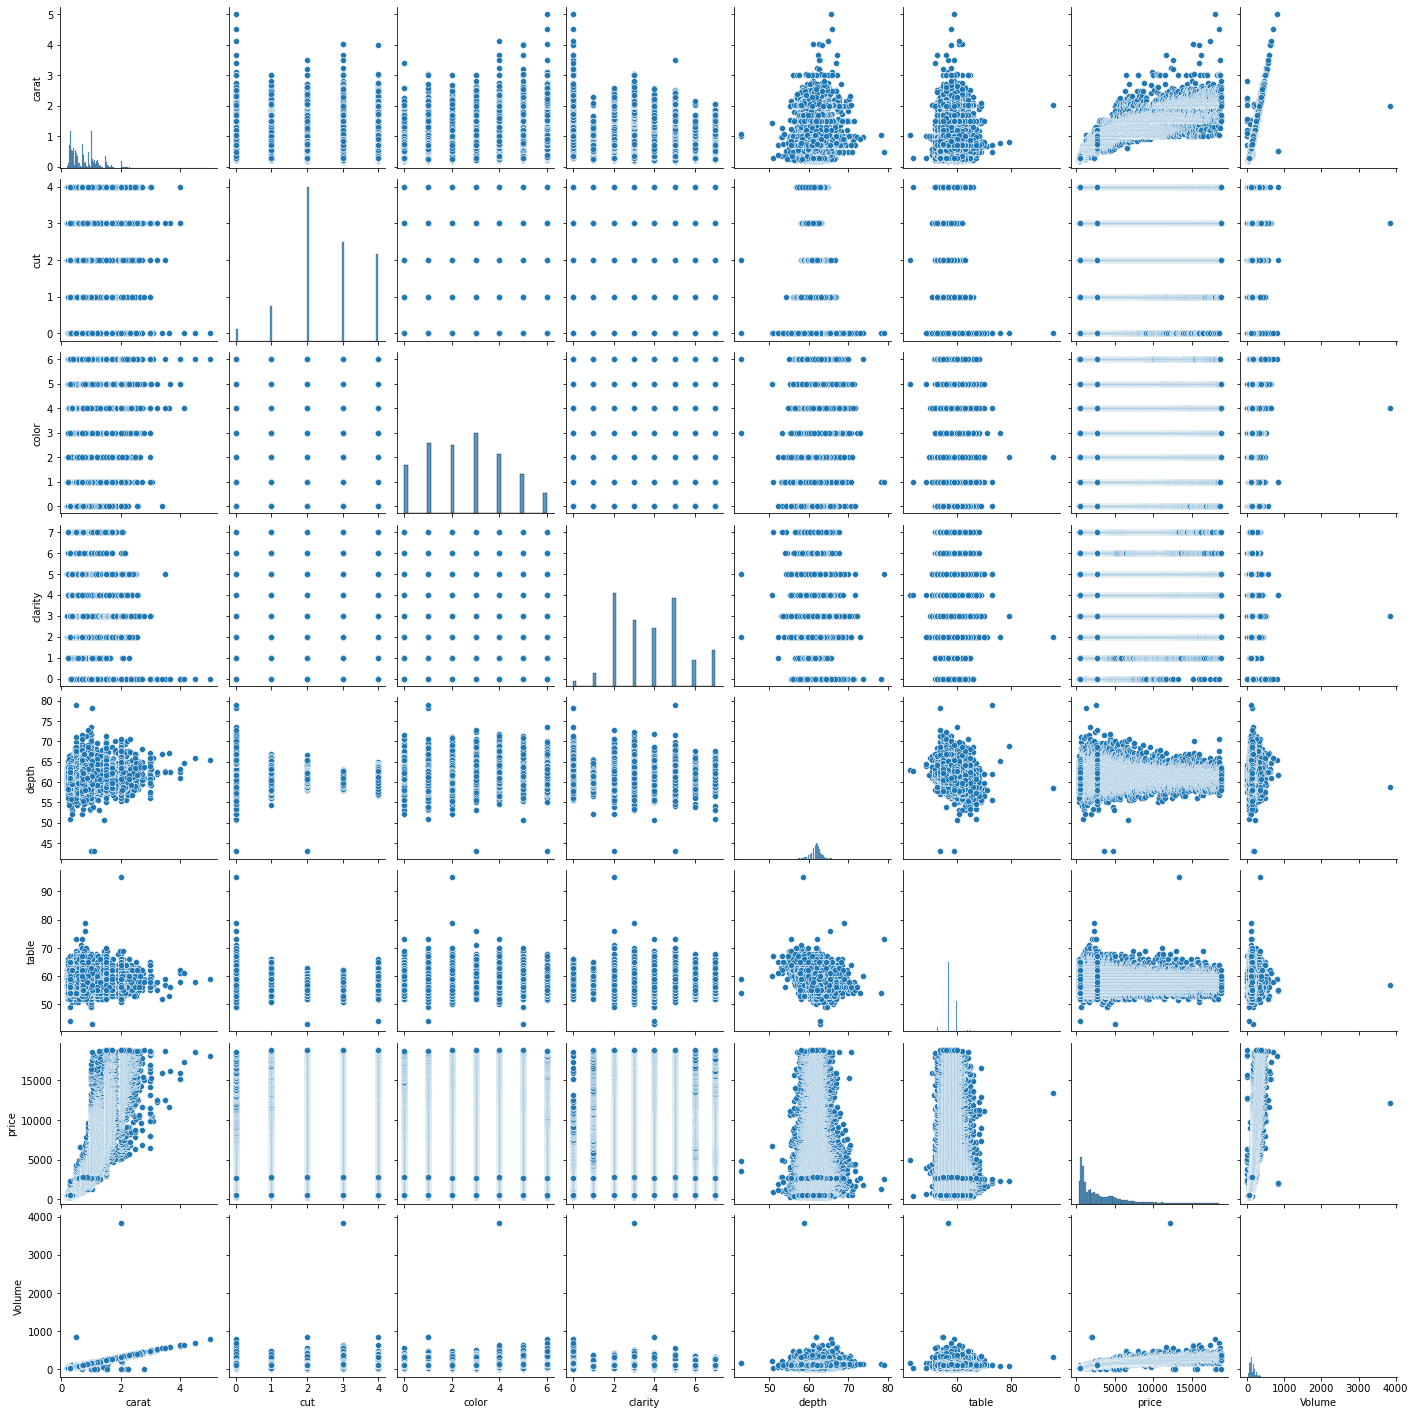

In [32]:
sns.pairplot(data)

CORRELATION

In [33]:
correlation = data.corr()
correlation

,carat,cut,color,clarity,depth,table,price,Volume
carat,1.000000,0.016628,0.291199,-0.215096,0.027445,0.183153,0.921780,0.974874
cut,0.016628,1.000000,0.001227,0.030472,-0.197934,0.150845,0.040253,0.021054
color,0.291199,0.001227,1.000000,-0.027274,0.047673,0.027128,0.172067,0.283599
clarity,-0.215096,0.030472,-0.027274,1.000000,-0.055459,-0.086602,-0.072100,-0.207215
depth,0.027445,-0.197934,0.047673,-0.055459,1.000000,-0.294828,-0.013112,0.007840
table,0.183153,0.150845,0.027128,-0.086602,-0.294828,1.000000,0.129283,0.168623
price,0.921780,0.040253,0.172067,-0.072100,-0.013112,0.129283,1.000000,0.901221
Volume,0.974874,0.021054,0.283599,-0.207215,0.007840,0.168623,0.901221,1.000000


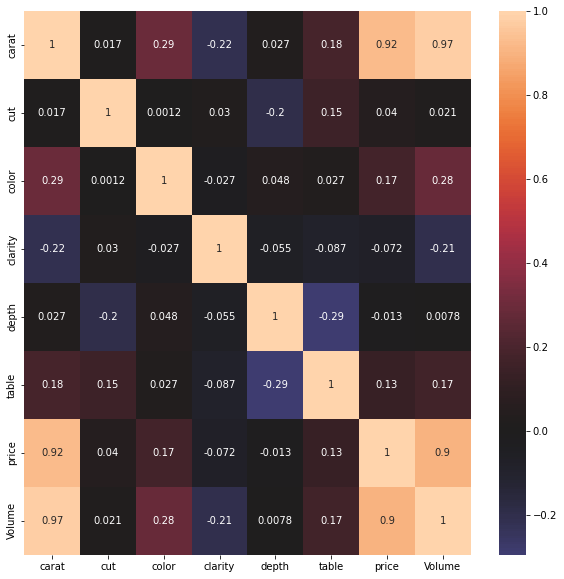

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation,annot=True,center=0)
plt.show()

SPLITTTING DATASET

In [35]:
x = data.drop(["price"],axis=1)
y = data["price"]

In [36]:
X_train , X_test , y_train , y_test = train_test_split(x,y,train_size=0.80)

In [37]:
#X_test

FEATURE SCALING

In [38]:
standardscaler = StandardScaler()
x_train = standardscaler.fit(X_train)
x_test = standardscaler.fit_transform(X_test)

# ALGORITHM

Linear Regression

In [39]:
linearregression = LinearRegression()
linearregression.fit(X_train,y_train)

LinearRegression()

In [40]:
y_predict = linearregression.predict(X_test)

In [41]:
y_predict

array([ 1685.19498179,  2453.09075613, -1101.71115877, ...,
        1207.84632599,  6008.20278727,  2184.56825031])

CALCUATE ERROR

In [42]:
print("Coefficient ",linearregression.coef_ ,"\n")
print("Intercept " ,linearregression.intercept_)

Coefficient  [ 8.27600459e+03  7.65673050e+01 -2.57232864e+02  3.05139872e+02
 -1.10054264e+02 -9.35486367e+01  6.03189517e-01] 

Intercept  8728.374046878527


In [43]:
print("Mean Square error ",  mean_squared_error(y_test,y_predict))

Mean Square error  2011464.0973633986


In [44]:
print("Accuracy",r2_score(y_test,y_predict))

Accuracy 0.8740649161269118


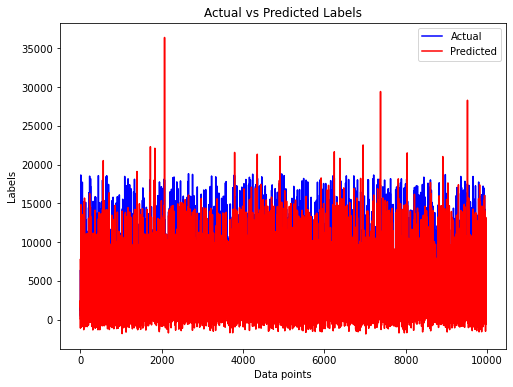

In [45]:
import matplotlib.pyplot as plt

# Assuming you have the predicted labels y_pred and actual labels y_test

# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)), y_predict, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.savefig('C://Users//debaj//Downloads//linear_diamond.jpg')
plt.show()



Ridge Regression

In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your feature matrix X and target variable y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model
ridge = Ridge(alpha=1.0)  # You can adjust the regularization parameter alpha

# Fit the model to the training data
ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2127051.7538211965


In [47]:
print("Accuracy",r2_score(y_test,y_pred))

Accuracy 0.8626451238369854


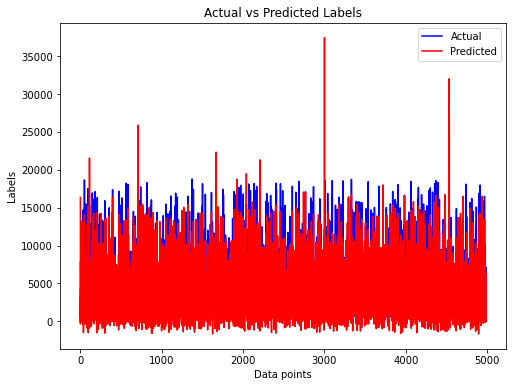

In [48]:
import matplotlib.pyplot as plt

# Assuming you have the predicted labels y_pred and actual labels y_test

# Plot the predicted and actual labels
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, color='b', label='Actual')
plt.plot(range(len(y_test)), y_pred, color='r', label='Predicted')
plt.xlabel('Data points')
plt.ylabel('Labels')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.savefig('C://Users//debaj//Downloads//ridge_diamond.jpg')

plt.show()